# Simple Demo of Scikit-Learn

## Imports

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Plotting setup

In [16]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
labels=['sr','og','^b']
colors=['r','g','b']

def plot_data(x,y,title):
    #Plot the results
    for i in [1,2,3]:
      plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
    plt.axis('tight');
    plt.xlabel('area');
    plt.ylabel('compactness');
    plt.title(title);
    

#Define classifier plotting function
def plot_classifier(x,y,clf,title):

    #Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                         np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx   = np.vstack((gx1l,gx2l)).T

    #Compute a prediction for every point in the grid
    gyhat = clf.predict(gx)
    gyhat = gyhat.reshape(gx1.shape)

    #Plot the results
    for i in [1,2,3]:
      plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
    plt.xlabel('area');
    plt.ylabel('compactness');
    plt.pcolormesh(gx1,gx2,gyhat,cmap=cmap_light)
    plt.colorbar();
    plt.axis('tight');
    plt.title(title);


## Load and plot seeds data set

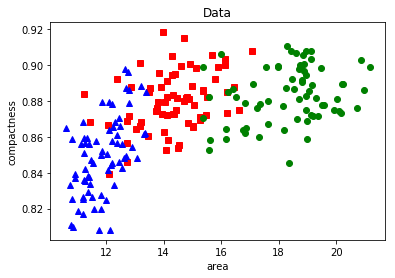

In [17]:
data = np.loadtxt('seeds_dataset.txt')
x = data[:,[0,2]]
y = data[:,-1]

plot_data(x, y, 'Data')

## Multiclass classification!

In [20]:
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


## Fit a (multiclass) logistic regression model

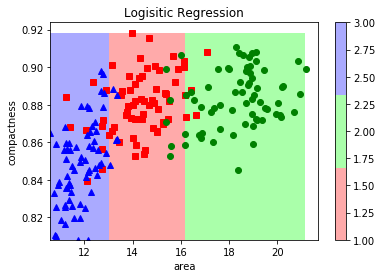

In [12]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(C=.1, solver='lbfgs', multi_class='auto')   # C = 1/lambda --> regularization!
clf.fit(x, y)
plot_classifier(x,y,clf,'Logisitic Regression')

## Fit an LDA model (Linear Discriminant Analysis)


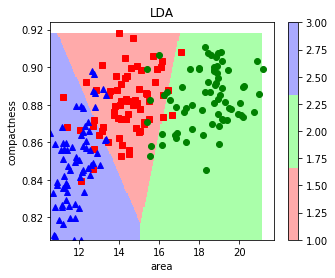

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(x, y)

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plot_classifier(x,y,clf,'LDA')

## Fit a (Gaussian) Naive Bayes model

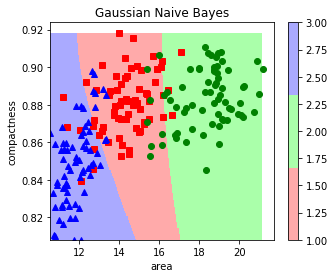

In [21]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x, y)

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plot_classifier(x,y,clf,'Gaussian Naive Bayes')